In [1]:
# Import libraries

# 1. Handling the data
import pandas as pd
import numpy as np

# 2. Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. Pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 6. Classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# Print the 5 rows of the dataset
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Exploring the dtype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check the shape of the data
data.shape

(920, 16)

In [5]:
# Maximum and minimum value of `id` column
print(f"Maximum id: {data['id'].max()}")
print(f"Minimum id: {data['id'].min()}")

Maximum id: 920
Minimum id: 1


In [6]:
# Maximum and minimum of `age` column
print(f"Maximum age: {data['age'].max()}")
print(f"Minimum age: {data['age'].min()}")

Maximum age: 77
Minimum age: 28


<Axes: xlabel='age', ylabel='Count'>

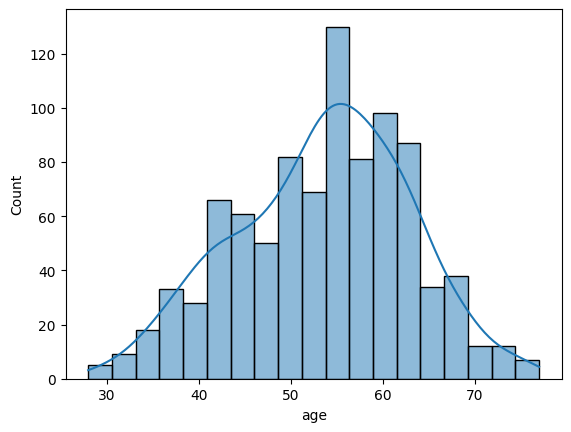

In [7]:
# Draw a histogram to see the distribution of the `age` column
sns.histplot(data, x="age", kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


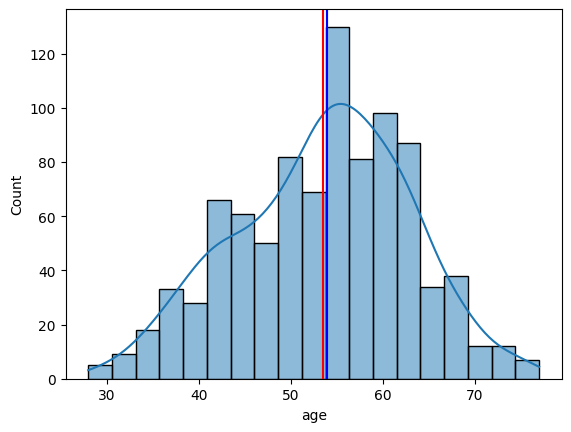

In [8]:
# Plotting the mean, median and mode of `age` column using Seaborn
sns.histplot(data['age'], kde=True)
plt.axvline(data['age'].mean(), color='red')
plt.axvline(data['age'].median(), color='green')
plt.axvline(data['age'].mode()[0], color='blue')

# Print the values
print('Mean:', data['age'].mean())
print('Median:', data['age'].median())
print('Mode:', data['age'].mode()[0])

In [9]:
# Plotting the histogram of `age` column using plotly and coloring this by `sex`
fig = px.histogram(data_frame=data, x='age', color='sex')
fig.update_layout(width=600, height=400)
fig.show()

In [10]:
# Find the value counts of `sex` column
data['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# Calculate the Percentage of Male and Female value counts
male_count = 726
female_count = 194
total_count = male_count + female_count

# Calculate Percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# Display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# Difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [12]:
# Plotting the histogram of `dataset` column and coloring this by `sex``
fig = px.histogram(data, x='dataset', color='sex')

# Show the plot
fig.show()

print(data.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [13]:
# A plot of `age` column and coloring this by `dataset` column
fig = px.histogram(data_frame=data, x='age', color='dataset')
fig.show()

In [14]:
# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {data.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of Data Set: {data.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of Data Set: {data.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


In [15]:
# Value counts of `cp` column
data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

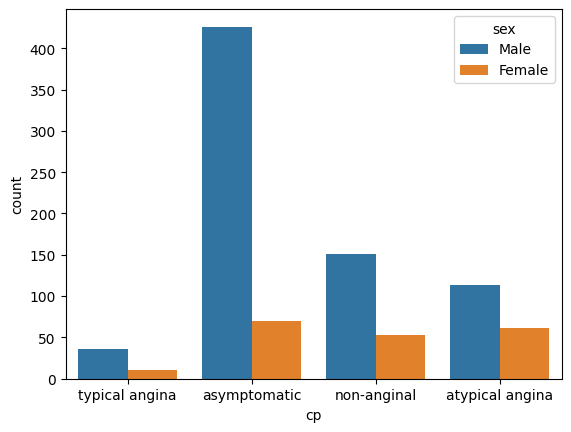

In [16]:
# Countplot of `cp` column `sex`
sns.countplot(data, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

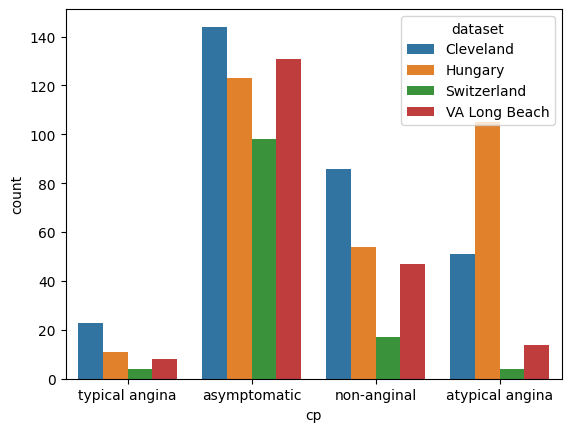

In [17]:
# Countplot of `cp` column `dataset`
sns.countplot(data, x='cp', hue='dataset')

In [18]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

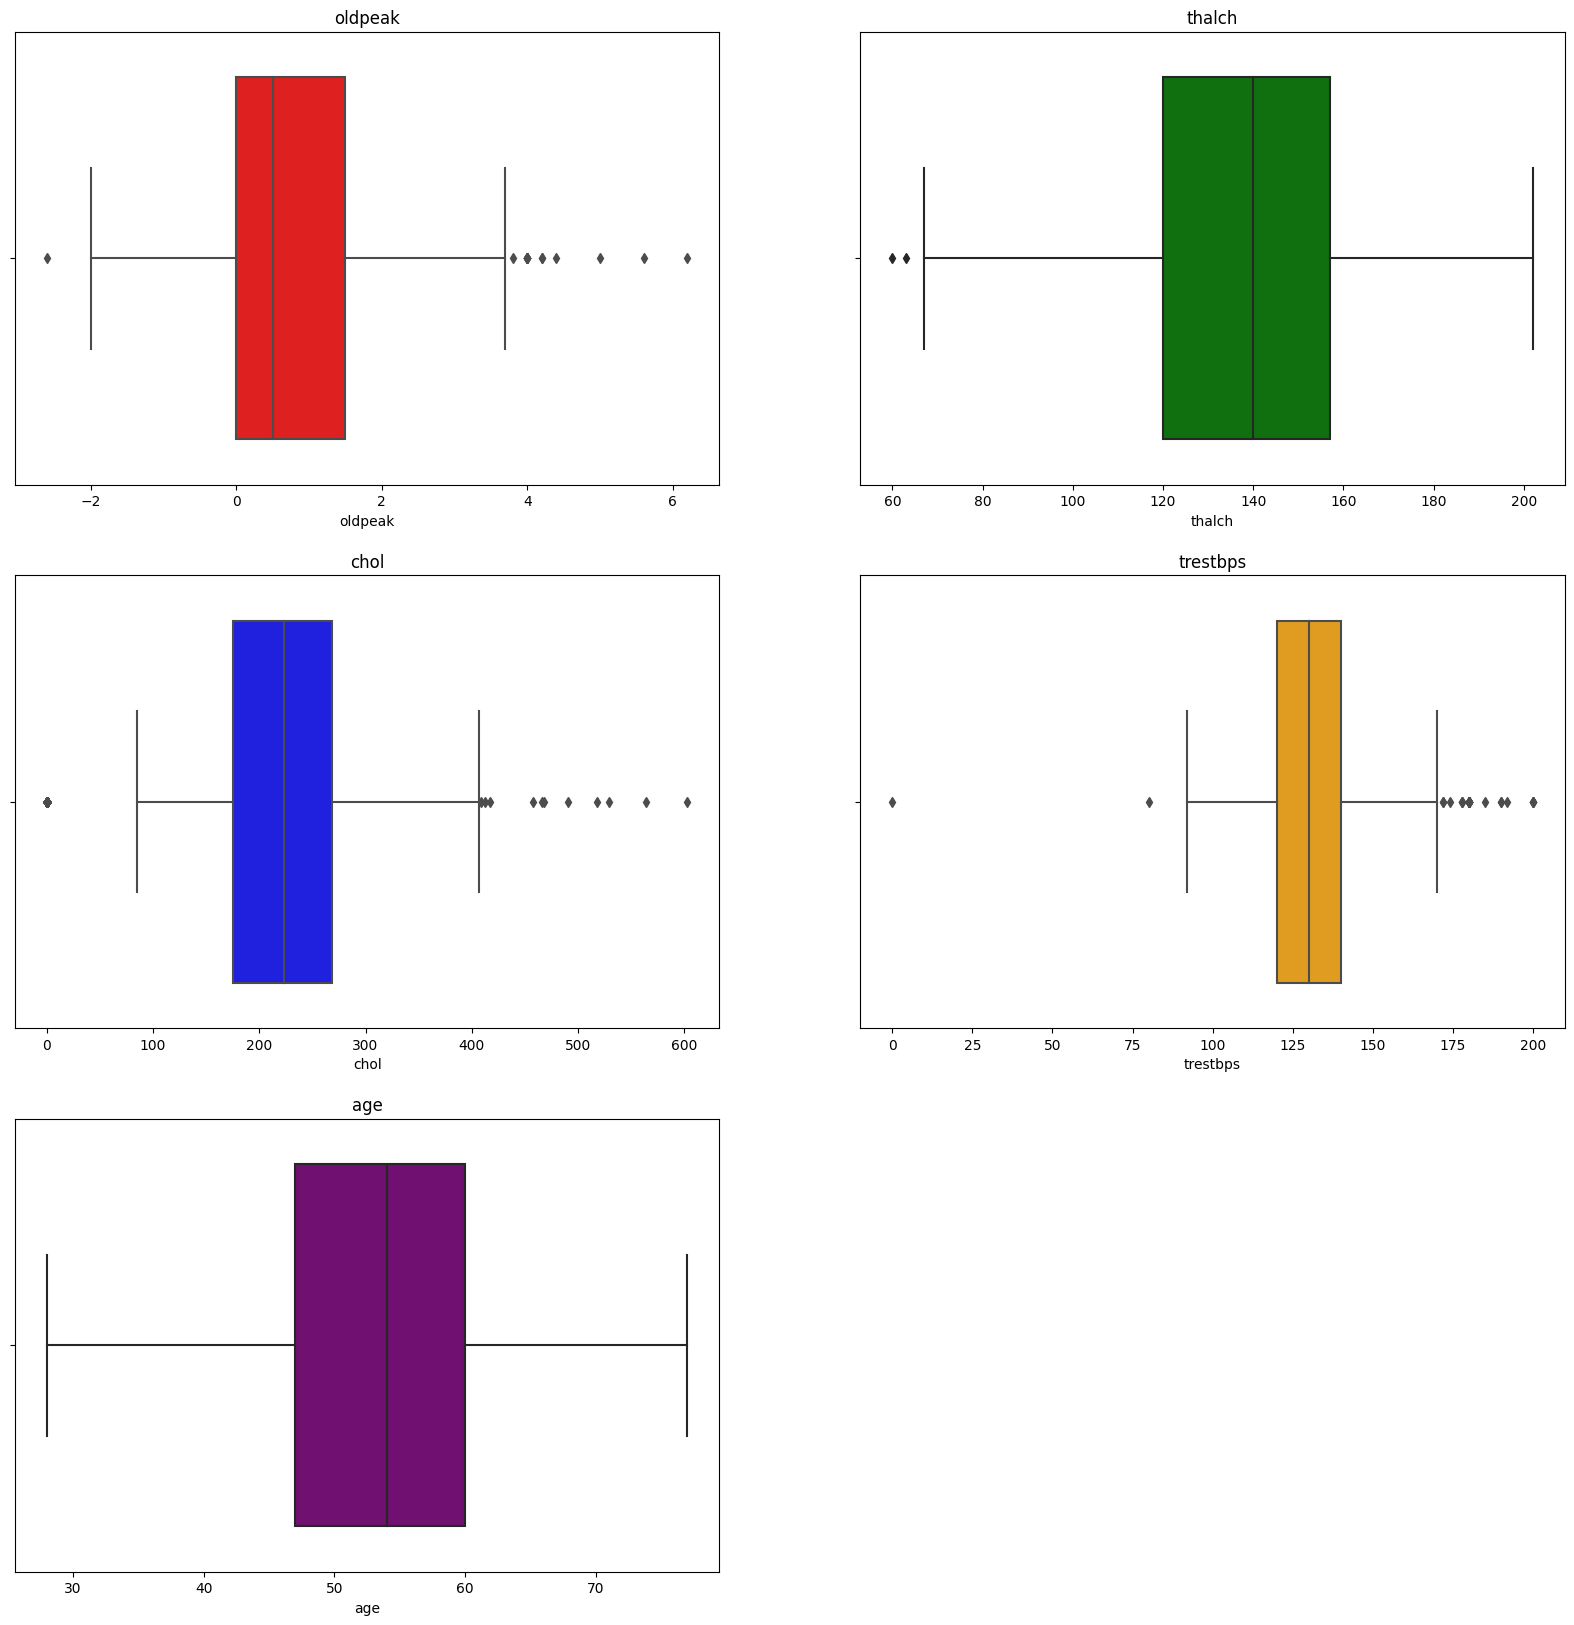

In [19]:
# Box-plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[col], color=colors[i])
    plt.title(col)
plt.show()

In [20]:
# Print the row from df where trestbps value is 0
data[data['trestbps'] == 0]

# Remove this row from data
data = data[data['trestbps'] != 0]

In [21]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
